# Random walk


## Context

A random walk models the evolution of a system in space as a sequence of elementary displacements, each chosen at random. Such stochastic dynamics arise naturally in a wide range of physical settings (e.g. Brownian motion) and display universal features that can be systematically analyzed. In this exam, we aim to simulate a two–dimensional random walk and investigate some of its properties numerically. For intuition, one may first consider the one–dimensional case: at each iteration (one step), the system moves randomly either to the right (forward, increment of $+1$) or to the left (backward, increment of $-1$).

The notebook is structured into three parts. The first part focuses on implementing a 2D random–walk simulation, first using pure Python and then leveraging \texttt{numpy}. The second and third parts are devoted to examining individual and collective characteristics of random–walk trajectories. A final bonus section introduces a modified version of the walk (not entirely random).


### Import packages and plot cosmetics

In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

## Implementation 

The equation which describes one single step of the random walk is $\vec{r}_{i+1} = \vec{r}_{i} + \vec{\Delta}_{i}$, where $\vec{r}_i$ is the position before the step, $\vec{r}_{i+1}$ is position after the step and $\vec{\Delta}_{i}$ is a *random vector*. Each coordinate of $\vec{\Delta}_{i}$ can take the value $-1$ or $1$ only, with a flat probablity $p=0.5$.


In [5]:
# function to return all the positions of the random walk, using only native python 
def random_walk_py(n):
    
    """"
    This function return two arrays of length $n$ each, 
    x_i and y_i, such as each position is defined 
    by r_i = (x_i, y_i). Step is either -1 or 1.
    """

    # defyining the vector with the starting point (0,0)
    Xs = [0]
    Ys = [0]

    # loop to produce the n steps
    for i in range(n-1):

        # use a random number being 0 or 1, multiply by 2 and subtracting 1 to get a step of -1 or 1
        step_x = (2 * random.randint(0,1)) - 1
        step_y = (2 * random.randint(0,1)) - 1

        #add step
        Xs.append(Xs[i] + step_x)
        Ys.append(Ys[i] + step_y)

    return Xs,Ys
        

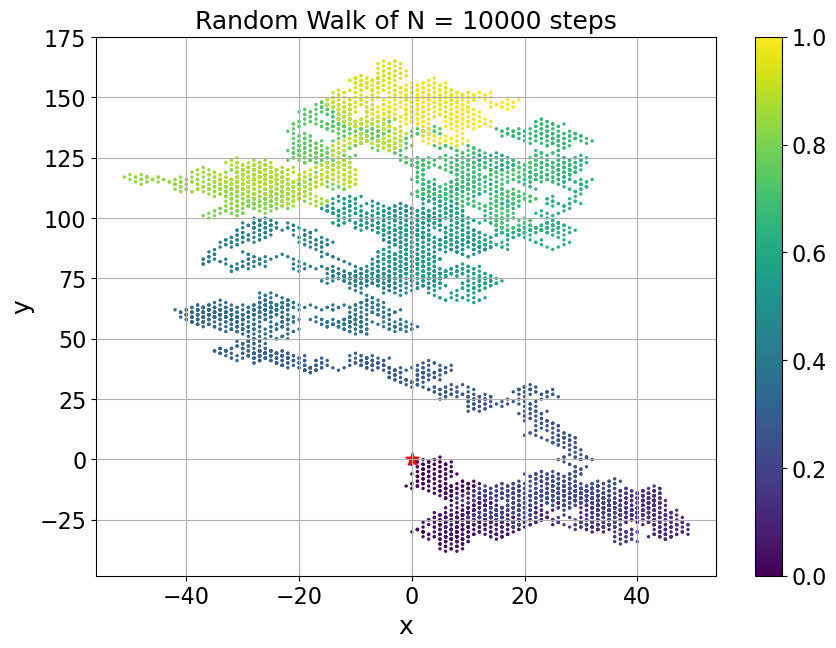

In [6]:
#Generating a random walk

N = 10000    # steps
x,y = random_walk_py(N)  # points
t = np.arange(N)

# Plotting the walk

plt.title(f"Random Walk of N = {N} steps")
plt.scatter(x,y, s = 2, c = t)
plt.scatter(0,0, c = "red", s = 100, marker = "*")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.colorbar()

# Saving fig
plt.savefig("random_walk_plot_py.png", dpi = 300)

In [7]:
# Using properties of numpy to create random walk function

def random_walk_np(n):
    
    Xs = (2*np.random.randint(0,2,n)) -1
    Ys = (2*np.random.randint(0,2,n)) -1

    # using cumsum to calculate the path
    Xs = np.cumsum(Xs)
    Ys = np.cumsum(Ys)

    return Xs, Ys
    

[   0    1    2 ... 9997 9998 9999]


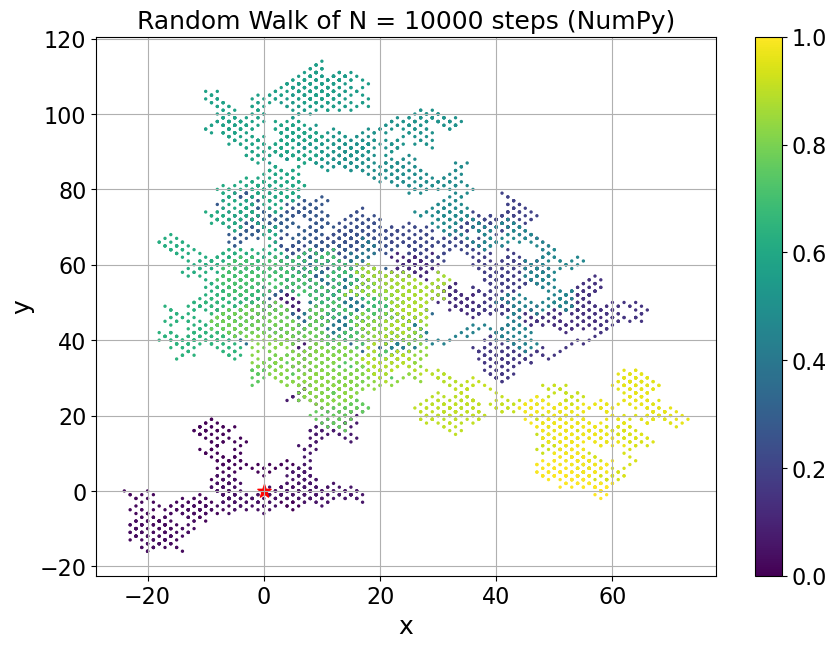

In [8]:
# Generating a random walk using numpy
N = 10000
x2,y2 = random_walk_np(N)
t = np.arange(N)
print(t)

# Plotting
plt.title(f"Random Walk of N = {N} steps (NumPy)")
plt.scatter(x2,y2, s = 2, c = t)
plt.scatter(0,0, c = "red", s = 100, marker = "*")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.colorbar()

# Saving fig
plt.savefig("random_walk_plot_np.png", dpi = 300)

In [9]:
# Compare the rapidity of the two function using the command `%timeit

%timeit random_walk_py(N)
%timeit random_walk_np(N)

10.1 ms ± 234 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
95.9 μs ± 2.85 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Individual properties of random walks 

The goal of this section is perform some computation related to a single random walk, related to the distance from the origin $|\vec{r}_i|$ as function of time.
 

In [10]:
#Generating a random walk with numpy for this section

N = 10000    # steps
x,y = random_walk_np(N)  # points
t = np.arange(N)

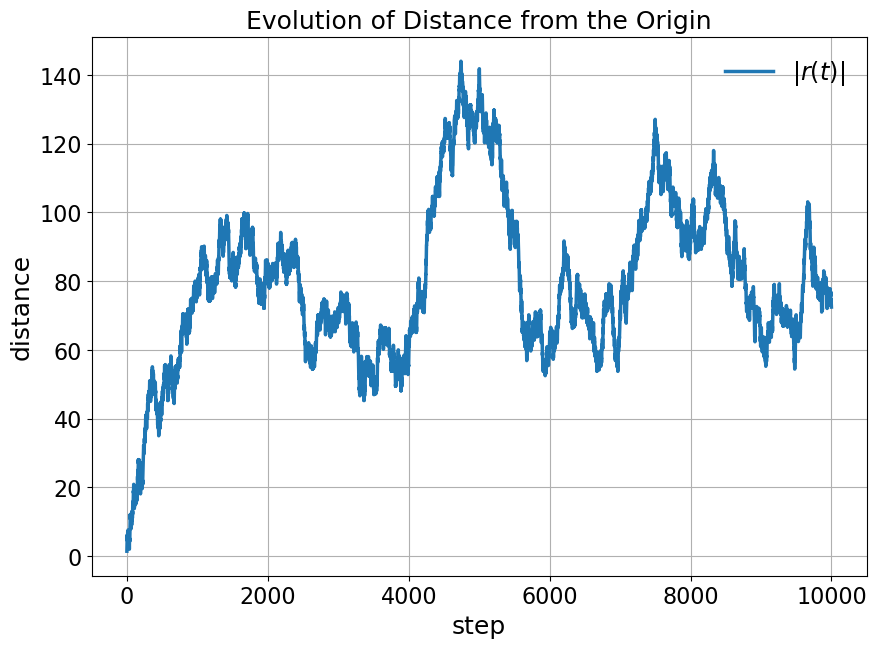

In [12]:
# Function to calculate the distance from the origin 

def distance(x,y):
    norm = np.sqrt(pow(x,2) + pow(y,2))
    return norm

norm_r = distance(x,y)

plt.title("Evolution of Distance from the Origin")
plt.plot(t,norm_r, label ="$|r (t)|$")
plt.xlabel("step")
plt.ylabel("distance")
plt.grid()
plt.legend()


# save fig
plt.savefig("random_walk_distance.png", dpi = 300)


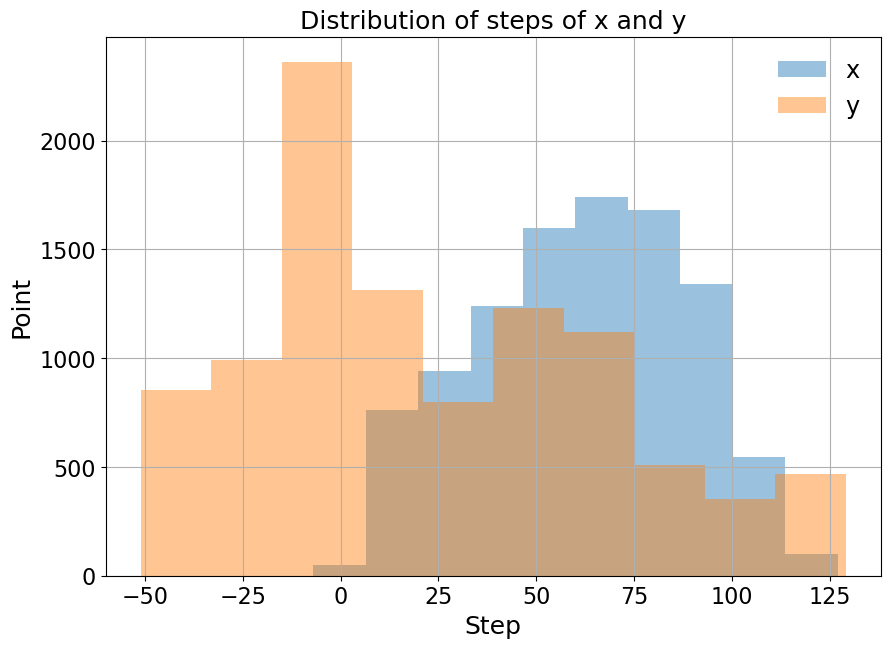

In [13]:
# Distribution of the x's and y's values

plt.title("Distribution of steps of x and y")
plt.hist(x, bins = 10, alpha=.45, label = "x")
plt.hist(y, bins = 10, alpha = .45, label = "y")
plt.xlabel("Step")
plt.ylabel("Point")
plt.legend()
plt.grid()

plt.savefig("random_walk_distribution_xy.png", dpi = 300)

The asymmetry $A_x$ ($A_y$) of the sample of points with respect to 0 along the $x$-axis ($y$-axis), defined as $$A_i = \frac{N(i>0) - N(i<0)}{N(i>0) + N(i<0)}$$
where $N(cond)$ is the number of points satisfying a given condition.

In [14]:
# numnber of points positive and negative for x and y

nx_pos = np.count_nonzero( x > 0 )
nx_neg = np.count_nonzero( x < 0 )

ny_pos = np.count_nonzero( y > 0 )
ny_neg = np.count_nonzero( y < 0 )


# Calculating assymetry for x and y

Ax = (nx_pos - nx_neg) / (nx_pos + nx_neg)
Ay = (ny_pos - ny_neg) / (ny_pos + ny_neg)


# Result

print(f"The assymetry for x is Ax = {Ax:.3f}")
print(f"The assymetry for y is Ay = {Ay:.3f}")

The assymetry for x is Ax = 0.993
The assymetry for y is Ay = 0.246


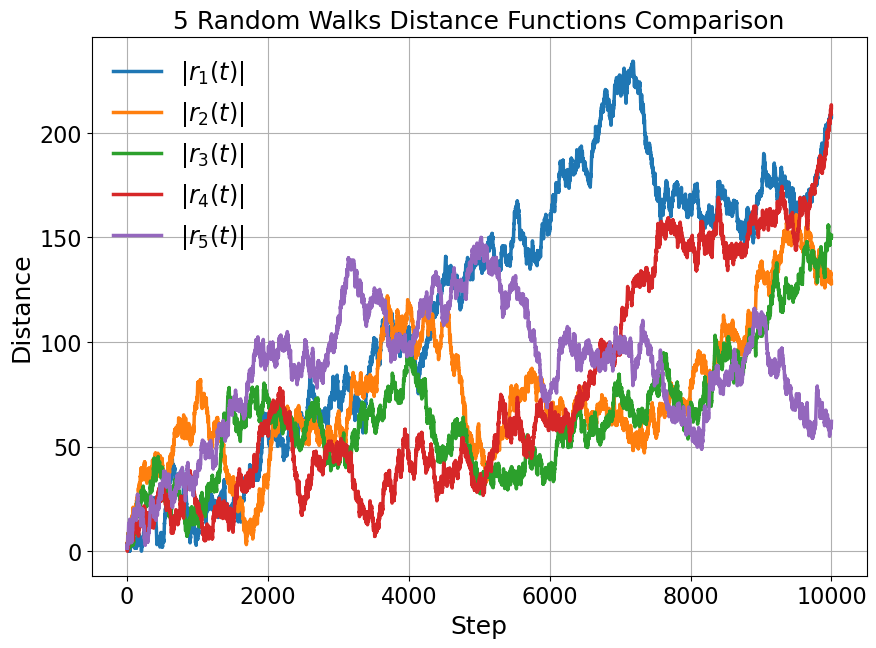

In [15]:
# Comparing 5 different random walks distance function

N = 10000
t = np.arange(N)

plt.title("5 Random Walks Distance Functions Comparison")
for i in range(5):
    x,y = random_walk_np(N)
    plt.plot(t, distance(x,y), label = f"$|r_{i+1}(t)|$")

plt.xlabel("Step")
plt.ylabel("Distance")
plt.legend()
plt.grid()
plt.savefig("random_walks_distance_comparison.png", dpi = 300)

## Statistical properties of random walks

The goal of this last section is analyse the statistical properties of random walks, and find in particular typical time dependence of the diffusion processes $d \sim \sqrt{t}$. 


sigma[x] = 100.8
sigma[y] = 100.8


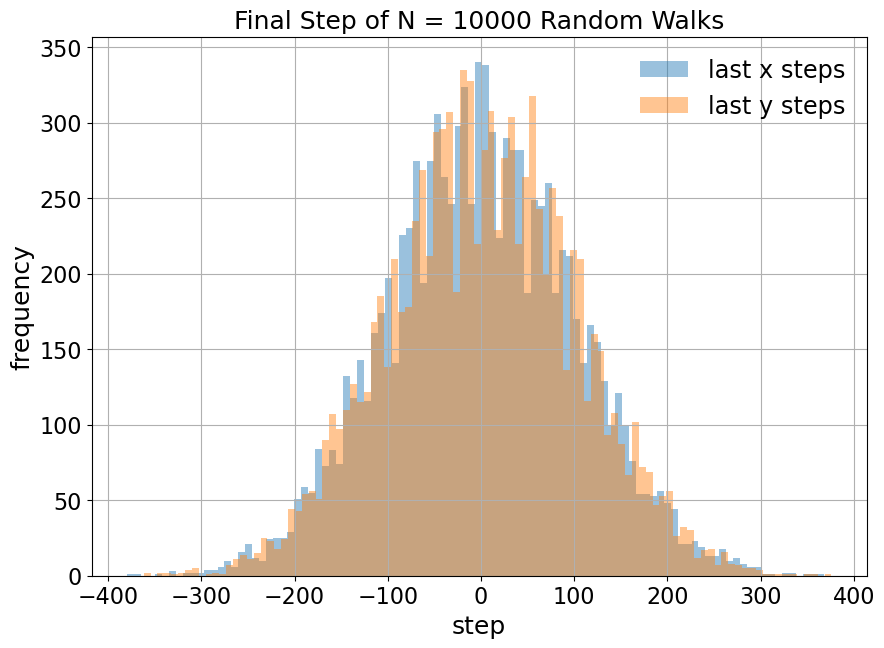

In [16]:
#simulate 10000 random walks of 10000 steps each and save the final 10000th $x$ and $y$ values of each random walk

N = 10000  # steps
n_walks = 10000  # number of walks
xs_last = []  # empty array for last x's values  
ys_last = []  # empty array for last y's values

# loop to produce the n walks
for i in range(n_walks):
    xs, ys = random_walk_np(N)
    xs_last.append( xs[-1] )
    ys_last.append( ys[-1] )

xs_last = np.array(xs_last)
ys_last = np.array(ys_last)


# Plot Distribution of final step

plt.title(f"Final Step of N = {n_walks} Random Walks")
plt.hist(xs_last, bins = 100, alpha = .45, label = "last x steps")
plt.hist(ys_last, bins = 100, alpha = .45, label = "last y steps")
plt.xlabel("step")
plt.ylabel("frequency")
plt.legend()
plt.grid()

plt.savefig("distribution_random_walks_final_step.png", dpi = 300)


# RMS for the distribution
print(f'sigma[x] = {xs_last.std():.1f}\nsigma[y] = {ys_last.std():.1f}')


In [17]:
#evolution of the RMS of the x_i, y_i positions distribution over the 10k walks

N = 10000  # steps
n_walks = 10000  # number of walks
xs_rms = [] 
ys_rms = []  

# loop to produce the n walks
for i in range(n_walks):
    xs, ys = random_walk_np(N)
    xs_rms.append( xs)
    ys_rms.append( ys)
    
xs_rms = np.array(xs_rms)
ys_rms = np.array(ys_rms)


[ 0.99988749  1.42477326  1.73942261 ... 99.87100269 99.88363286
 99.88267275]


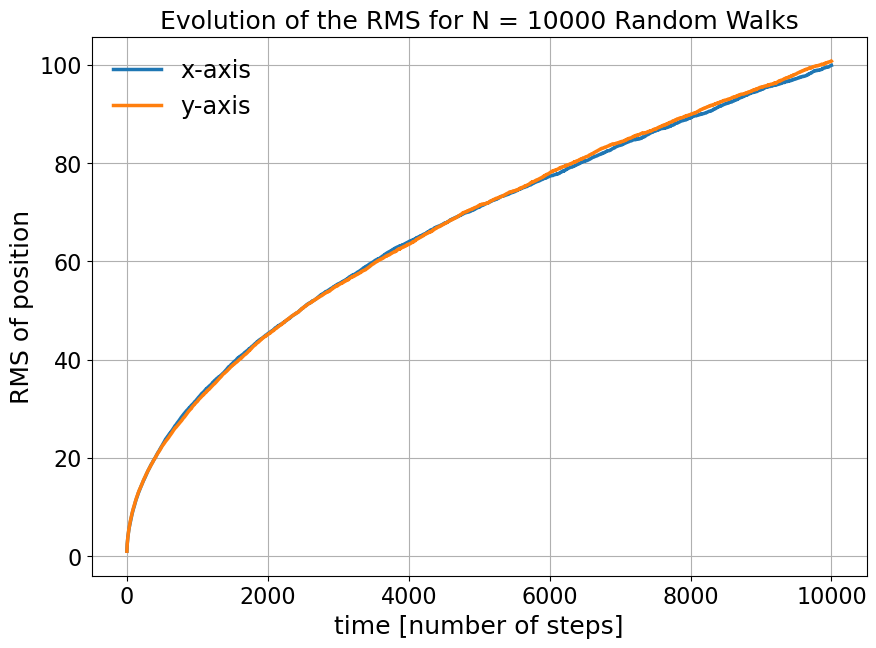

In [18]:
# Calculate RMS of all the walks
rmsX = np.std(xs_rms, axis=0)
rmsY = np.std(ys_rms, axis=0)

#Plot
plt.title(f"Evolution of the RMS for N = {n_walks} Random Walks")
plt.plot(rmsX, label='x-axis')
plt.plot(rmsY, label='y-axis')
plt.xlabel('time [number of steps]')
plt.ylabel('RMS of position')
plt.grid()
plt.legend()
print(rmsX)